In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [48]:
#load data
data = pd.read_csv("C:\\Users\\PC\\OneDrive\\Desktop\\Wine Quality Prediction Model\\WineQT.csv")

In [49]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
#checking the overview of the data
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [51]:
rows, columns = data.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  1143
Number of columns:  13


In [52]:
# Check the data types
print(data.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [53]:
#provides a concise summary of a DataFrame including the number of non-null values in each column, and the type of data they contain.
# This method is particularly useful for quickly understanding the structure and contents of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [54]:
#checking for null values
data.isnull().sum().sum()

np.int64(0)

In [55]:
#checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [56]:
#carrying out some statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


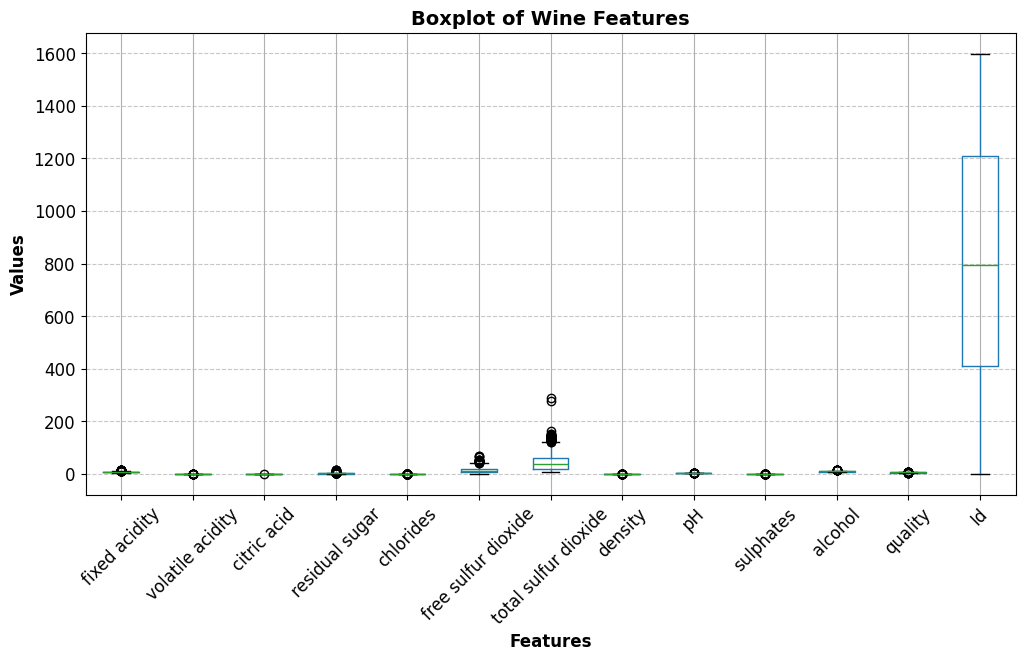

In [57]:

plt.figure(figsize=(12,6))  # Slightly larger figure
data.boxplot()

# Enhance labels
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)  # Increase y-axis font size
plt.title("Boxplot of Wine Features", fontsize=14, fontweight='bold')  # Add title
plt.xlabel("Features", fontsize=12, fontweight='bold')
plt.ylabel("Values", fontsize=12, fontweight='bold')

# Use a clean style
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()



fixed acidity: 44 outliers detected
volatile acidity: 14 outliers detected
citric acid: 1 outliers detected
residual sugar: 110 outliers detected
chlorides: 77 outliers detected
free sulfur dioxide: 18 outliers detected
total sulfur dioxide: 40 outliers detected
density: 36 outliers detected
pH: 20 outliers detected
sulphates: 43 outliers detected
alcohol: 12 outliers detected
quality: 22 outliers detected
Id: 0 outliers detected


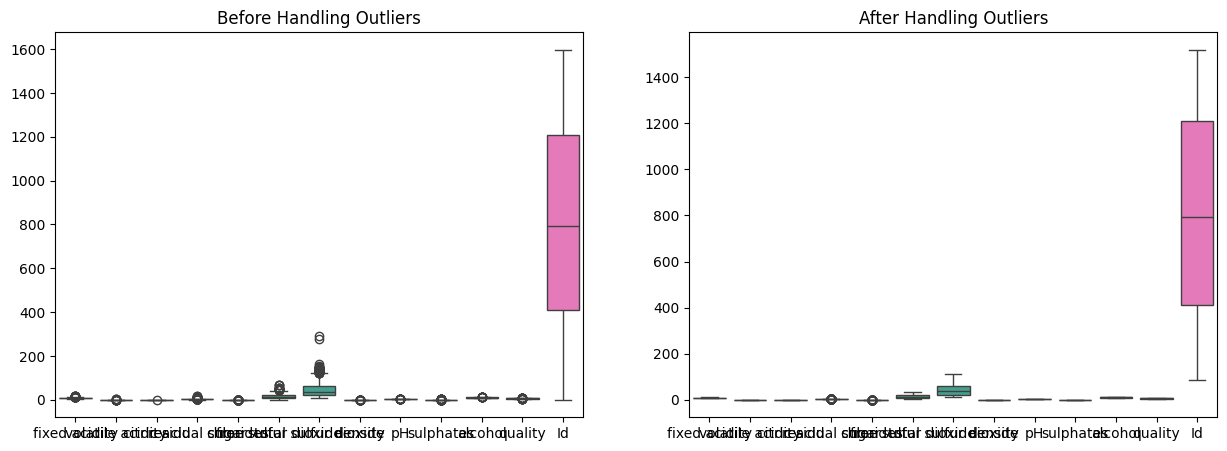

In [58]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns



# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Function to detect and handle outliers using IQR + Winsorization
def handle_outliers(df, method="winsorize", limit=0.05):
    df_clean = df.copy()
    for col in num_cols:  # Loop through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected")

        if method == "winsorize":
            # Winsorizing: Cap values at 5th and 95th percentiles
            df_clean[col] = winsorize(df[col], limits=[limit, limit])
        elif method == "remove":
            # Remove outliers completely
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Apply Winsorization to cap extreme values
data_clean = handle_outliers(data, method="winsorize", limit=0.05)

# Boxplot before and after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=data, ax=axes[0])
axes[0].set_title("Before Handling Outliers")

sns.boxplot(data=data_clean, ax=axes[1])
axes[1].set_title("After Handling Outliers")

plt.show()


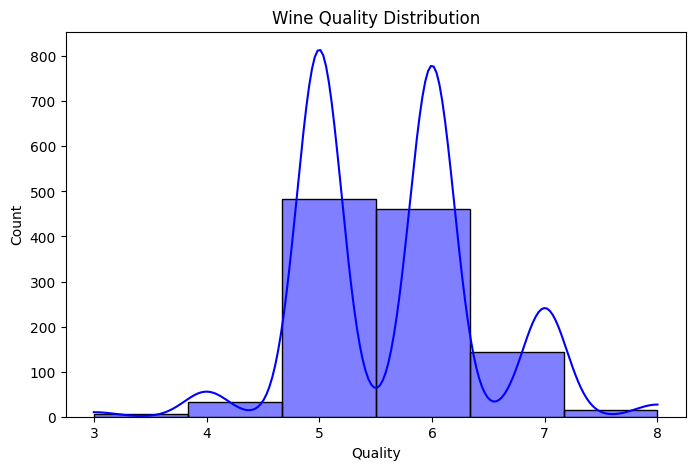

In [59]:
# Histogram of the quality distribution
plt.figure(figsize=(8,5))
sns.histplot(data['quality'], bins=6, kde=True, color='blue')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_6420\216155954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')


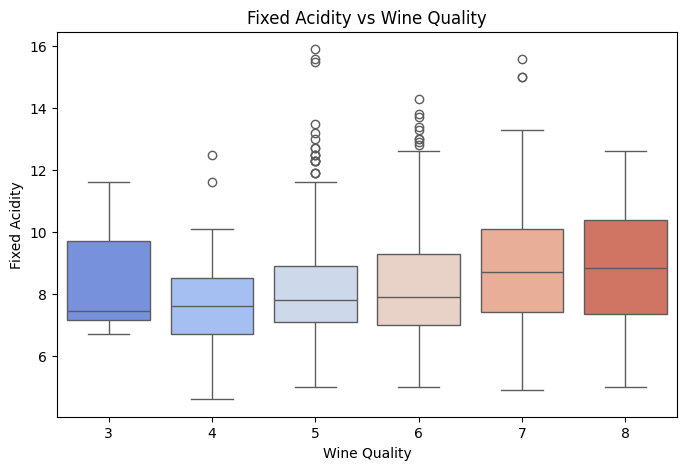

In [60]:
#Boxplot of fixed acidity vs wine quality
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')
plt.title('Fixed Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()


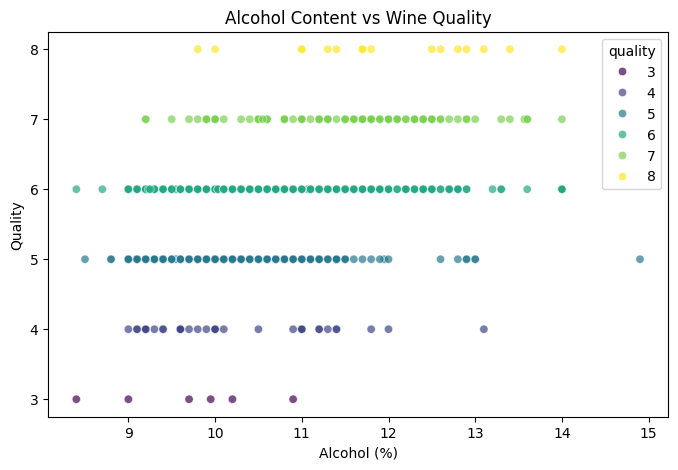

In [61]:
#Scatterplot of alcohol content vs wine quality
plt.figure(figsize=(8,5))
sns.scatterplot(x='alcohol', y='quality', data=data, hue='quality', palette='viridis', alpha=0.7)
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.show()


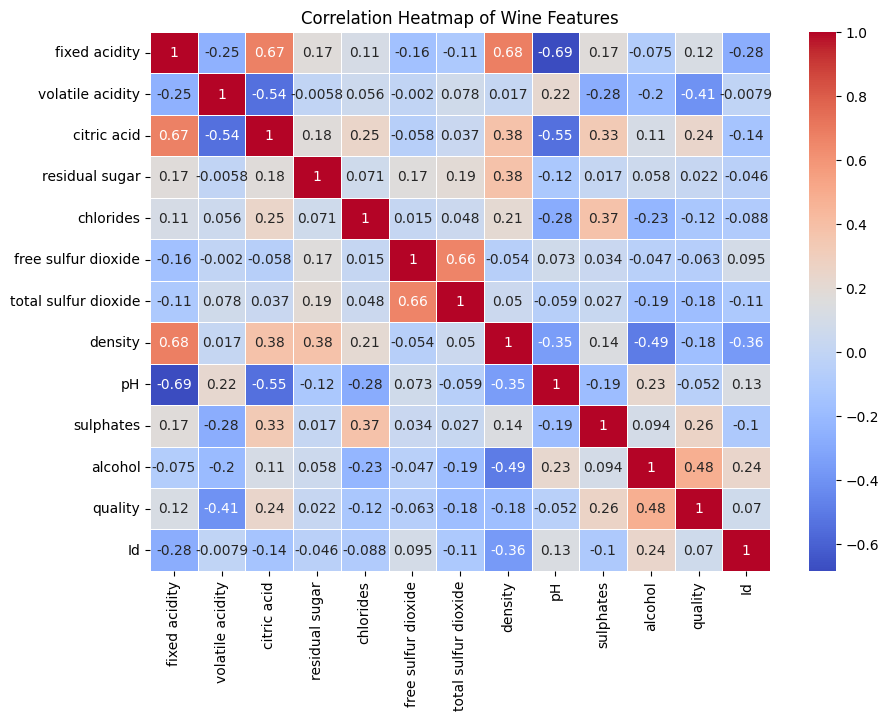

In [62]:
#Correlation heatmap of wine features
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()


In [63]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [64]:
data = data.drop(columns=["Id"])


In [65]:
X = data.drop(columns=["quality"])  # Features
y = data["quality"]  # Target


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


In [68]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [69]:
y_pred = model.predict(X_test_scaled)


In [70]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.38


In [71]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Convert to percentage
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 31.71%


In [72]:
# Convert quality into categories (Classification)
data['quality_class'] = data['quality'].apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))


In [73]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop(columns=["quality", "quality_class"])  # Drop unnecessary columns
y = data["quality_class"]  # Use classification labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Classification Model Accuracy: {accuracy:.2f}%")


Classification Model Accuracy: 68.12%


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the model
clf = RandomForestClassifier(random_state=42)


In [77]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']
}


In [78]:
# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of combinations to try
    cv=5,  # Cross-validation folds
    verbose=2, 
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit model on training data
random_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [79]:
# Train the model with best params
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_best = best_clf.predict(X_test_scaled)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
best_accuracy = accuracy_score(y_test, y_pred_best) * 100

print(f"Improved Accuracy: {best_accuracy:.2f}%")


Improved Accuracy: 71.62%
